## Homework 01: due 22:00, Friday, September 30, 2022

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Assignment number (e.g., b88501045-HW1), put all the python scripts and notebook files into the folder and zip the folder (e.g., b88501045-HW1.zip).
### - Submit the homework directly through the NTU COOL course website.


### You will work with the attached CSV data file _Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv_, and your specific tasks are:

#### 0. import essential modules

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. (5% + 5%) Import CSV data file, and make column 'date' datetime format 

In [162]:
fn_data_in = './Data/Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv'

hw1_rain = pd.read_csv(fn_data_in)

hw1_rain['date']=pd.to_datetime(hw1_rain['date'],format='%Y/%m/%d')


# hw1_rain.head(5)

#### 2. (25% + 5%) Calculate rainfall totals for each year, and make a line plot illustrating the annual rainfall for location "1_9943". The x-axis is for time (in year) and the y-axis for rainfall totals (in mm), respectively. There shall be plot title ('annual rainfall'), legend and text labels for x- and y-axes for the plot.

In [163]:
hw1_rain_year_sum = hw1_rain.resample('1Y', on='date').sum()


In [164]:
location = hw1_rain_year_sum.iloc[0:]['1_9943']

# location

In [165]:
df = pd.DataFrame(location)

# df
first_column = df.columns[0]
# print(first_column)
first_col_data = df[first_column]

# print(first_col_data)
# print(location.index)
x = location.index
y = first_col_data
# x


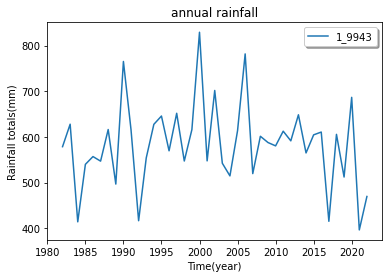

In [166]:

fig = plt.figure()          
ax = fig.add_subplot(111)

plt.plot(x, y, label='1_9943')
plt.title("annual rainfall")
plt.xlabel("Time(year)")
plt.ylabel("Rainfall totals(mm)")
leg = ax.legend( loc = 'upper right', shadow=True)
plt.show()

#### 3. (25% + 5%) Calculate maximum 1-day rainfall for each month, and export to a CSV file named _Rain_MD-Androy-Bekily_1d-1M-Mean_19810101-20211231_CHIRPS.csv_ 

In [167]:
hw1_rain_month_max = hw1_rain.resample('1M', on='date').max()

# print(hw1_rain_month_max)

fn_data_out = './Rain_MD-Androy-Bekily_1d-1M-Mean_19810101-20211231_CHIRPS.csv'
hw1_rain_month_max.to_csv(fn_data_out, float_format='%.2f')

#### 4. (25% + 5%) Calculate maximum 3 calendar-day rainfall for calendar month November for each year, and export to a CSV file named _Rain_MD-Androy-Bekily_3d-Nov-Max_19810101-20210530_CHIRPS.csv_ 

In [168]:
hw1_rain_3d_sum = hw1_rain.resample('3D', on='date').sum()

hw1_rain_3d_max = hw1_rain_3d_sum.resample('1M').max()
hw1_rain_3d_max['date']=hw1_rain_3d_max.index
# print(hw1_rain_3d_max)
hw1_rain_nov_max = hw1_rain_3d_max[hw1_rain_3d_max['date'].dt.month == 11]

# print(hw1_rain_nov_max)

fn_data_out_1 = './Rain_MD-Androy-Bekily_3d-NOV-MAX_19810101-20211231_CHIRPS.csv'

hw1_rain_nov_max.to_csv(fn_data_out_1, float_format='%.2f')


### For your reference, CHIRPS (Climate Hazards Group InfraRed Precipitation with Station data) is a satellite-based precipitation product. It has provided quasi-global rainfall estimate for over 35 years. You can find more information about CHRIPS via this link: https://www.nature.com/articles/sdata201566

### The CSV data file you work with here was clipped over a town called Bekily in the region of Androy Province, Madagascar. Farmers from Bekily are one of the poorest in the world, having no resources to build irrigation system, thus suffering a lot from the drought ( a consequence of climate change, impacting many regions in the world). 